## 


![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250521102603.png)

> Source: [Number of U.S. farms continues slow decline](https://www.ers.usda.gov/data-products/charts-of-note/chart-detail?chartId=111304), [original-image](https://www.ers.usda.gov/data-products/ag-and-food-statistics-charting-the-essentials/farming-and-farm-income)

### 在图形中直接标注图例

<a href="https://www.ers.usda.gov/data-products/agricultural-and-food-research-and-development-expenditures-in-the-united-states">
    <img style="width: 550px" src="https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250521104655.png">
</a>



> Source: [Ag and Food Expenditures USDA and Universities](https://www.ers.usda.gov/data-products/agricultural-and-food-research-and-development-expenditures-in-the-united-states)


<a href="https://www.ers.usda.gov/data-products/ag-and-food-statistics-charting-the-essentials/farming-and-farm-income">
    <img style="width: 550px" src="https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250521145357.png">
</a>

> Source: [Most farmers receive off-farm income; small-scale operators depend on it](https://www.ers.usda.gov/data-products/ag-and-food-statistics-charting-the-essentials/farming-and-farm-income)

## 手动处理图例



<a href="https://www.ers.usda.gov/data-products/ag-and-food-statistics-charting-the-essentials/rural-economy">
    <img style="width: 550px" src="https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250521151853.png">
</a>

- Source: [Nonmetro education levels are improving, but still lag metro](https://www.ers.usda.gov/data-products/ag-and-food-statistics-charting-the-essentials/rural-economy) 
- [ChatGPT - 复现图形的提示词](https://chatgpt.com/share/682d87c4-9128-8005-ad66-4c726c7ab784)

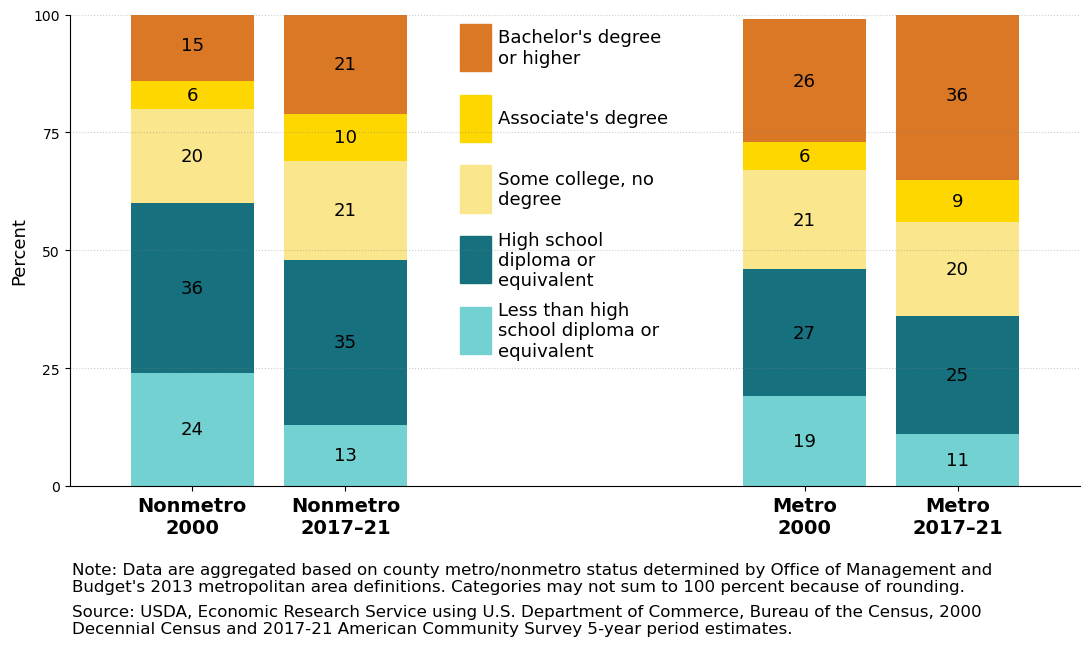

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import textwrap

# 数据与颜色
categories = [
    "Less than high school diploma or equivalent",
    "High school diploma or equivalent",
    "Some college, no degree",
    "Associate's degree",
    "Bachelor's degree or higher"
]
colors = ["#74d1d1", "#16707d", "#fae68c", "#ffd700", "#db7826"]

data = {
    "Nonmetro 2000": [24, 36, 20, 6, 15],
    "Nonmetro 2017–21": [13, 35, 21, 10, 21],
    "Metro 2000": [19, 27, 21, 6, 26],
    "Metro 2017–21": [11, 25, 20, 9, 36]
}

# 极大加宽中间空白
x = [0, 1, 4, 5]  # 两组间隔为 3，显著拉大
bar_width = 0.8

fig, ax = plt.subplots(figsize=(11, 6))

# 堆叠柱状图
bottoms = np.zeros(len(x))
for i, (cat, color) in enumerate(zip(categories, colors)):
    values = [data[label][i] for label in data.keys()]
    bars = ax.bar(x, values, bottom=bottoms, color=color, width=bar_width, edgecolor='none')
    # 添加数值标签
    for j in range(len(x)):
        ax.text(x[j], bottoms[j] + values[j]/2, str(values[j]),
                ha="center", va="center", fontsize=13, color="black")
    bottoms += values

# 嵌入式图例，极大加宽且动态多行
legend_x = 2.0   # 图例置于空白区正中
legend_y_base = 97
legend_dy = -15
wrap_width = 18  # 根据字号适当调整每行宽度

for i, (cat, color) in enumerate(reversed(list(zip(categories, colors)))):
    wrapped_cat = "\n".join(textwrap.wrap(cat, width=wrap_width))
    y_loc = legend_y_base + i * legend_dy
    # 色块
    ax.add_patch(plt.Rectangle((legend_x - 0.25, y_loc - 9), 0.20, 10, color=color, clip_on=False, transform=ax.transData))
    # 文字
    ax.text(legend_x, y_loc - 4, wrapped_cat, va='center', ha='left', fontsize=13, color='black', linespacing=1.15)

# x轴标签
ax.set_xticks(x)
ax.set_xticklabels([
    "Nonmetro\n2000",
    "Nonmetro\n2017–21",
    "Metro\n2000",
    "Metro\n2017–21"
], fontsize=14, fontweight='bold')

ax.set_yticks([0, 25, 50, 75, 100])
ax.set_ylabel("Percent", fontsize=13)
ax.set_ylim(0, 100)
ax.set_xlim(-0.8, 5.8)

# 边框和网格优化
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis='y', linestyle=':', color='gray', alpha=0.4)

plt.tight_layout()

# 添加图形底部注释
import textwrap   # 支持文本自动换行

note1 = ("Note: Data are aggregated based on county metro/nonmetro status determined by Office of Management and Budget's 2013 metropolitan area definitions. "
         "Categories may not sum to 100 percent because of rounding.")
note2 = ("Source: USDA, Economic Research Service using U.S. Department of Commerce, Bureau of the Census, "
         "2000 Decennial Census and 2017-21 American Community Survey 5-year period estimates.")

# 自动换行，每行最多 105 个字符
wrap_width = 105
note1_wrapped = "\n".join(textwrap.wrap(note1, width=wrap_width))
note2_wrapped = "\n".join(textwrap.wrap(note2, width=wrap_width))

plt.subplots_adjust(bottom=0.18)

# Note 段落
fig.text(0.07, 0.0, note1_wrapped, ha="left", va="bottom", fontsize=12, color="black")
# Source 段落（比 Note 略低一行，差值 0.03-0.035）
fig.text(0.07, -0.07, note2_wrapped, ha="left", va="bottom", fontsize=12, color="black")


plt.show()


# 嵌入式图例的堆叠条形图可视化技巧

## 1. 图形设计亮点与解读

这幅堆叠条形图通过分组展示了不同区域（Nonmetro 与 Metro）以及不同时间段（2000 与 2017–21）居民的学历结构。每根柱子以五种颜色代表五个学历层级，能够直观比较不同群体间结构分布的变化趋势。

本例最具特色的设计是**嵌入式图例**：将图例直接放置于两组柱状体之间的大空白区域。这种做法有如下优点：

* **空间高效**：中间空白区域本身没有有效数据展示，将图例嵌入其间可以更紧凑地利用版面，减少外部留白。
* **可读性强**：观者无需频繁转移视线，可直接在图形中心找到每种颜色对应的含义，提高信息获取效率。
* **视觉统一**：图例和主图结构协调统一，使整体观感更为美观、平衡。

## 2. 技术细节与实现方法

* **中间空白宽度手动调整**
  通过设置 `x = [0, 1, 4, 5]`，显著拉大了两组柱形之间的间隔，为图例留足空间。这种方式非常适合分组较少、数据柱之间允许适度拉开的场景。

* **图例手动绘制**
  没有使用 Matplotlib 的 `ax.legend()`，而是用 `ax.add_patch()` 单独绘制色块，并配合 `ax.text()` 精确控制文本注释的位置和样式。这样可以确保图例在任意位置灵活显示，适应不同排版需求。

* **长文字动态多行适应**
  借助 `textwrap.wrap()`，将过长的图例文字分成 2-3 行，以适应空白区宽度，防止文字越界或遮挡右侧柱状图。通过调节 `wrap_width` 可根据实际情况灵活控制每行的字符数。

* **比例数值标签美观居中**
  每个堆叠区块中央都用黑色数字标注比例，字体适中，便于快速对比数据差异，增强了图表的可解释性。

* **图形风格统一优化**
  取消顶部和右侧边框、使用淡灰色虚线网格、合理设置字体、柱宽和整体布局，使图形既专业又易于嵌入讲义或报告。

## 3. 拓展建议与适用场景

* **适合类别较少的数据结构**
  当柱状体数量不多（如 3-5 个），且分组之间留有适度空白时，嵌入式图例可以极大提升排版效率和阅读体验。
* **灵活移植到报告、演示等多种场景**
  可根据页面布局进一步调整空白区和图例宽度，以适应不同的导出或展示需求。
* **注意可访问性**
  对于长图例或高密度分组数据，建议仍采用传统图例放置方式，避免信息混杂或空间拥挤。

---

本案例为教学型可视化提供了清晰的范例：如何利用**灵活布局与手动美化**，打造既美观又高效的信息展示图。


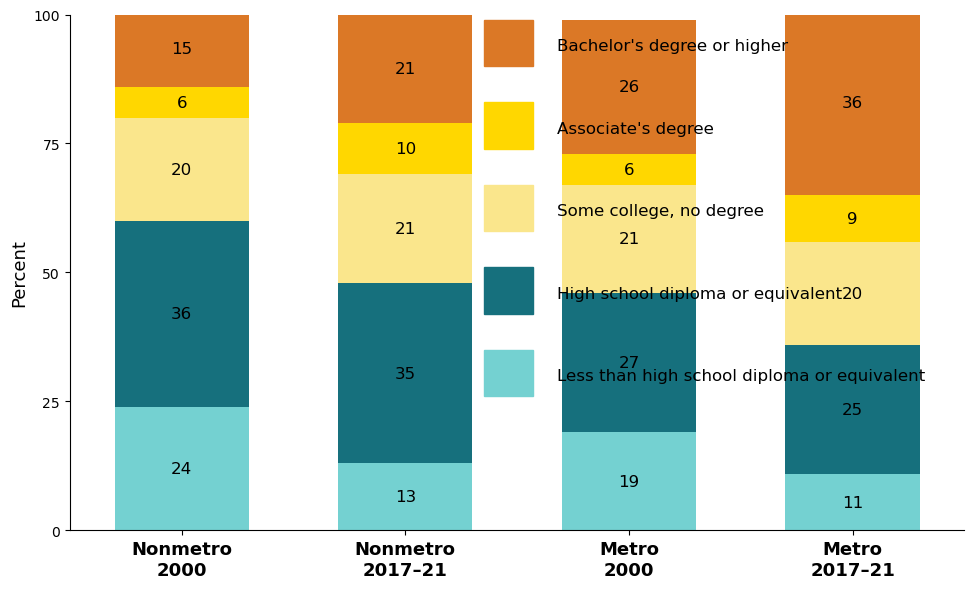

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# 类别与颜色（高度还原原图）
categories = [
    "Less than high school diploma or equivalent",
    "High school diploma or equivalent",
    "Some college, no degree",
    "Associate's degree",
    "Bachelor's degree or higher"
]
colors = ["#74d1d1", "#16707d", "#fae68c", "#ffd700", "#db7826"]

# 数据
data = {
    "Nonmetro 2000": [24, 36, 20, 6, 15],
    "Nonmetro 2017–21": [13, 35, 21, 10, 21],
    "Metro 2000": [19, 27, 21, 6, 26],
    "Metro 2017–21": [11, 25, 20, 9, 36]
}
labels = list(data.keys())

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(labels))
bar_width = 0.6

bottoms = np.zeros(len(data))

# 先绘制条形图
rects = []
for i, (cat, color) in enumerate(zip(categories, colors)):
    values = [data[label][i] for label in labels]
    rect = ax.bar(x, values, bottom=bottoms, color=color, width=bar_width, edgecolor='none')
    rects.append(rect)
    # 添加每一段的数值标签
    for j in range(len(values)):
        ax.text(x[j], bottoms[j] + values[j]/2, str(values[j]),
                ha="center", va="center", fontsize=12, color="black")
    bottoms += values

# 自定义嵌入式图例
legend_x = 1.5  # Nonmetro 和 Metro 的中点
legend_y_base = 100
legend_dy = -16  # 每个类别间距
for i, (cat, color) in enumerate(reversed(list(zip(categories, colors)))):
    ax.text(legend_x + 0.18, legend_y_base + i*legend_dy - 6,
            cat,
            va='center', ha='left', fontsize=12, color='black')
    ax.add_patch(plt.Rectangle((legend_x - 0.15, legend_y_base + i*legend_dy - 10),
                               0.22, 9, color=color, clip_on=False, transform=ax.transData))

# 调整 x 轴与标签
ax.set_xticks(x)
ax.set_xticklabels(["Nonmetro\n2000", "Nonmetro\n2017–21", "Metro\n2000", "Metro\n2017–21"],
                   fontsize=13, fontweight='bold')

# Y轴只显示 0,25,50,75,100
ax.set_yticks([0,25,50,75,100])
ax.set_ylabel("Percent", fontsize=13)
ax.set_ylim(0, 100)
ax.set_xlim(-0.5, 3.5)

# 取消右边和上边的边框
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# 适当收紧布局
plt.tight_layout()
plt.show()
